# Fundamental Analysis

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import math
from io import StringIO
import talib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
class AlphaVantageIntegration():
    # API_KEY = ""
    # API_KEY_II = ""
    API_KEY_1 = "" #Enter API Key
    API_KEY_2 = "" #Enter API Key
    API_KEY_3 = "" #Enter API Key
    API_KEY_4 = "" #Enter API Key
    API_KEY_5 = "" #Enter API Key
    API_KEY_6 = "" #Enter API Key
    URL = "https://www.alphavantage.co/query"
    

    @staticmethod
    def getData(stockName, timeInterval):
        if(timeInterval == 'oneHour'):
            dataToSend = {
                "function":"TIME_SERIES_INTRADAY_EXTENDED",
                "interval":"60min",
                "slice":"year1month1",
            }
        elif(timeInterval == 'fourHour'):
            dataToSend = {
                "function":"TIME_SERIES_INTRADAY_EXTENDED",
                "interval":"60min",
                "slice":"year1month1",
            }
        elif(timeInterval == 'oneDay'):
            dataToSend = {
                "function":"TIME_SERIES_DAILY",
                "outputsize":"full",
                "datatype":"csv"
            }
        else:
            dataToSend = {
                "function":"TIME_SERIES_WEEKLY",
                "datatype":"csv"
            }

        dataToSend['symbol'] = stockName
        dataToSend['apikey'] = AlphaVantageIntegration.API_KEY_1
        return requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend).text
    
    @staticmethod
    def getDailyDF(stockName):
        dataToSend = {
            "function":"TIME_SERIES_DAILY",
            "symbol":stockName,
            "outputsize":"full",
            "datatype":"csv",
            "apikey": AlphaVantageIntegration.API_KEY_1
        }
        return requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend).text    

    @staticmethod
    def getBollingerData(stockName, timeInterval):
        dataToSend = {
            "function":"BBANDS",
            "symbol":stockName,
            "time_period":"20",
            "series_type":"close",
            "nbdevup":"3",
            "nbdevdn":"3",
            "interval": AlphaVantageIntegration.getInterval(timeInterval),
            "apikey": AlphaVantageIntegration.API_KEY_2,
            "datatype":"csv"
        }
        return requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend).text
    
    @staticmethod
    def getMACDData(stockName, timeInterval):
        dataToSend = {
            "function":"MACD",
            "symbol":stockName,
            "time_period":"5",
            "series_type":"close",
            "datatype":"csv",
            "interval": AlphaVantageIntegration.getInterval(timeInterval),
            "apikey": AlphaVantageIntegration.API_KEY_3
        }
        return requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend).text

    @staticmethod
    def getRSIData(stockName, timeInterval):
        dataToSend = {
            "function":"RSI",
            "symbol":stockName,
            "time_period":"5",
            "series_type":"close",
            "datatype":"csv",
            "interval": AlphaVantageIntegration.getInterval(timeInterval),
            "apikey": AlphaVantageIntegration.API_KEY_4
        }
        return requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend).text
    
    @staticmethod
    def getFundamentalData(stockName):
        dataToSend = {
                "function":"OVERVIEW",
                "symbol":stockName,
                "apikey": AlphaVantageIntegration.API_KEY_1
            }
        response = requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend)
        return json.loads(response.text)
    
    @staticmethod
    def getCompanyEarnings(stockName):
        dataToSend = {
                "function":"EARNINGS",
                "symbol":stockName,
                "apikey": AlphaVantageIntegration.API_KEY_2
            }
        response = requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend)
        return json.loads(response.text)
    
    @staticmethod
    def getIncomeStatement(stockName):
        dataToSend = {
                "function":"INCOME_STATEMENT",
                "symbol":stockName,
                "apikey": AlphaVantageIntegration.API_KEY_3
            }
        response = requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend)
        return json.loads(response.text)
    
    @staticmethod
    def getBalanceStatement(stockName):
        dataToSend = {
                "function":"BALANCE_SHEET",
                "symbol":stockName,
                "apikey": AlphaVantageIntegration.API_KEY_4
            }
        response = requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend)
        return json.loads(response.text)
    
    @staticmethod
    def getCashFlow(stockName):
        dataToSend = {
                "function":"CASH_FLOW",
                "symbol":stockName,
                "apikey": AlphaVantageIntegration.API_KEY_5
            }
        response = requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend)
        return json.loads(response.text)
    
    @staticmethod
    def getVolume(stockName):
        dataToSend = {
            "function":"GLOBAL_QUOTE",
            "symbol":stockName,
            "apikey": AlphaVantageIntegration.API_KEY_6
        }
        response = requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend)
        print(response.text)
        return json.loads(response.text)['Global Quote']['06. volume']
    
    @staticmethod
    def getQuoteDetails(stockName):
        dataToSend = {
            "function":"GLOBAL_QUOTE",
            "symbol":stockName,
            "apikey": AlphaVantageIntegration.API_KEY_6
        }
        response = requests.request("GET", AlphaVantageIntegration.URL, params=dataToSend)
        print(response.text)
        return json.loads(response.text)
    

In [3]:
###Utilities Function
def calculateDiscRate(beta):
    discRate = 5
    beta = round(beta, 1)
    if(beta<=0.8):
        discRate = 5
    elif(beta<=1):
        discRate = 6
    elif(beta == 1.1):
        discRate = 6.5
    elif(beta == 1.2):
        discRate = 7
    elif(beta == 1.3):
        discRate = 7.5
    elif(beta == 1.4):
        discRate = 8
    elif(beta == 1.5):
        discRate = 8.5
    elif(beta >= 1.6):
        discRate = 9
        
    return discRate
    
def calculatePercentChange(value, percent, increase = True):
    if(increase):
        return value * ( 1 + percent / 100)
    else:
        return value * ( 1 - percent / 100)

def buyPrice(val):
    if val<5:
        return val+0.01
    elif val>=5 and val<10:
        return val+0.02
    elif val>=10 and val<50:
        return val+0.03
    elif val>=50 and val<100:
        return val+0.  
    elif val>=100:
        return val+0.1

def sellPrice(val):
    if val<5:
        return val-0.01
    elif val>=5 and val<10:
        return val-0.02
    elif val>=10 and val<50:
        return val-0.03
    elif val>=50 and val<100:
        return val-0.05
    elif val>=100:
        return val-0.1

def stopLoss(val):
    if val<5:
        return val-0.01
    elif val>=5 and val<10:
        return val-0.02
    elif val>=10 and val<50:
        return val-0.03
    elif val>=50 and val<100:
        return val-0.05
    elif val>=100:
        return val-0.1

In [23]:
class TechnicalAnalysis:
    
    def __init__(self,stockName):
        self.stockName = stockName
        self.companyDailyData = pd.read_csv(StringIO(AlphaVantageIntegration.getDailyDF(stockName)))
        self.model_output = None
        self.model = None    
        
    def isBullishPinBar(self, df):
        bullPB = []
        for i in range(len(df)):
            o = df['open'][i]
            h = df['high'][i]
            l = df['low'][i]
            c = df['close'][i]
            r = h-l#range
            if c>o and o-l>(2*r)/3:
                bullPB.append(1)
            elif c<o and c-l>(2*r)/3:
                bullPB.append(1)
            else:
                bullPB.append(0)
        return df.assign(bullPB = bullPB)

    def isBearishPinBar(self, df):
        
        bearishPB = []
        for i in range(len(df)):
            o = df['open'][i]
            h = df['high'][i]
            l = df['low'][i]
            c = df['close'][i]
            r = h-l#range
            if c>o and h-c>(2*r)/3:
                bearishPB.append(1)
            elif c<o and h-o>(2*r)/3:
                bearishPB.append(1)
            else:
                bearishPB.append(0)
        return df.assign(bearishPB = bearishPB)

    def addBolingerBands(self, df,  timeperiod=20, nbdevup=2, nbdevdn=2, matype=0):
        
        upper, middle, lower = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
        return df.assign(upper = upper,
                       middle = middle,
                       lower = lower)

    
    def addMacd(self, df, fastperiod=12, slowperiod=26, signalperiod=9):
        
        macd, macdsignal, macdhist = talib.MACD(df['close'], fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
        return df.assign(macd = macd,
                       macdsignal = macdsignal,
                       macdhist = macdhist)

    def addMacd(self, df, fastperiod=12, slowperiod=26, signalperiod=9):
        
        macd, macdsignal, macdhist = talib.MACD(df['close'], fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
        return df.assign(macd = macd,
                       macdsignal = macdsignal,
                       macdhist = macdhist)
    
    def addRSI(self, df, fastperiod=12, timeperiod = 10):
        
        rsi = talib.RSI(df['close'], timeperiod = timeperiod)
        return df.assign(rsi = rsi)
    


    def getBMRTriggers(self, rsiOverSoldTrigger = 30, rsiOverBoughtTrigger = 70):
        df = self.companyDailyData
        df = self.isBearishPinBar(self.isBullishPinBar(df))

        df = df[::-1]
        df = self.addRSI(self.addMacd(self.addBolingerBands(df)))
        df = df[::-1]
        df = df[:-100]
        category = []
        for x in range(len(df)):
            if df.iloc[x]['macd'] > df.iloc[x]['macdsignal'] :   
        
                if df.iloc[x]['rsi'] <= rsiOverSoldTrigger and df.iloc[x]['low']< df.iloc[x]['lower'] and df.iloc[x]['bullPB']==1:
                    buyprice = buyPrice(df.iloc[x]['high'])
                    category.append("Strong Buy")
                    
                elif df.iloc[x]['rsi']>rsiOverSoldTrigger and df.iloc[x]['rsi']<=rsiOverBoughtTrigger:
                    
                    if df.iloc[x]['bullPB']==1:
                        buyprice = buyPrice(df.iloc[x]['high'])
                        category.append("Buy")
                        
                    else:
                        category.append("Neutral")
                else:
                    category.append("Neutral")
            else:
                
                if (df.iloc[x]['rsi']>=rsiOverBoughtTrigger or df.iloc[x]['high']> df.iloc[x]['upper']):
                    sellprice = sellPrice(df.iloc[x]['high'])
                    category.append("Strong Sell")
                
                elif (df.iloc[x]['rsi']>rsiOverSoldTrigger and df.iloc[x]['rsi']<=rsiOverBoughtTrigger):
                    
                    if df.iloc[x]['bearishPB']==1:
                        sellprice = sellPrice(df.iloc[x]['high'])
                        category.append("Sell")
                        
                    else:
                        category.append("Neutral")
                        
                else:
                    category.append("Neutral")
                    
        df["triggers"] = np.array(category)
        return df
    
    def getMACDRSITriggers(self, initialCap = 10000, nSamples = 1300):
        """MACD Confirmed RSI"""
        df = self.companyDailyData
        df = df[::-1]
        df = self.addRSI(self.addMacd(df,fastperiod=7, slowperiod=13, signalperiod=9),
                        timeperiod = 25)
        df = df[::-1]
        df = df[:-100]
        df = df[::-1]
        df = df[-nSamples:]
        ############
        signal = []
        state = "open"
        buyprice=0
        buyQty = 0
        currentCap = initialCap
        holdings = 0 #with margin
        nTriggers = 0
        nPositives = 0
        nNegatives = 0
        
        
        for x in range(len(df)):
            if state=="open":
                if df.iloc[x]['macd'] > df.iloc[x]['macdsignal'] and df.iloc[x]['rsi'] > 35:
                    signal.append("BUY")
                    nTriggers += 1
                    state = "notopen"
                    buyprice = df.iloc[x]['close']
                    buyQty = round(currentCap/buyprice) 
                    holdings = buyQty * buyprice
                    currentCap = currentCap - holdings
                else:
                    signal.append("WAIT")
            else:
                if (df.iloc[x]['macd'] < df.iloc[x]['macdsignal'] and df.iloc[x]['rsi'] > 71): 
                    signal.append("SELL")
                    state = "open"
                    if df.iloc[x]['close'] >= buyprice:
                        currentCap = currentCap + (buyQty * df.iloc[x]['close'])
                        nPositives += 1
                    else:
                        currentCap = currentCap + (buyQty * df.iloc[x]['close'])
                        nNegatives += 1
                    buyQty = 0
                    holdings = 0

                elif df.iloc[x]['low']>1.35*buyprice:
                    signal.append("SELL")
                    state = "open"
                    currentCap = currentCap + (buyQty * 1.35 * buyprice)
                    nPositives += 1
                    buyQty = 0
                    holdings = 0

                elif df.iloc[x]['low']<0.85*buyprice:
                    signal.append("SELL")
                    state = "open"
                    currentCap = currentCap + (buyQty * 0.85 * buyprice)
                    nNegatives += 1
                    buyQty = 0
                    holdings = 0

                else:
                    signal.append("HOLD")

        print("Initial Capital: " + str(initialCap))
        print("Current Total Capital: " + str(currentCap + holdings))
        print("Total triggers: " + str(nTriggers))
        print("Total Win triggers: " + str(nPositives))
        print("Total Loss triggers: " + str(nNegatives))
        df['triggers'] = signal
        return df

In [5]:
class RNN:
    def __init__(self, dataFrame):
        self.companyDailyData = dataFrame
#         print(self.companyDailyData)
        self.model_output = None
        self.model = None
        
    def createModel(self):
        self.model = Sequential()
        self.model.add(Embedding(20000, 32))
        self.model.add(LSTM(32, dropout=0.0, recurrent_dropout=0.0))
        self.model.add(Dense(self.companyDailyData["triggers"].nunique(), activation='softmax'))
        
    def fitModel(self):
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy', 
                           metrics=['accuracy'])
        
        scaler = MinMaxScaler()

        x = self.companyDailyData.drop(columns=["triggers", "timestamp"])
        y = self.companyDailyData["triggers"]
        
        data_train, data_test, label_train, label_test = train_test_split(x,  
                                                                          pd.get_dummies(y).values,
                                                                          test_size=0.2)
        
        scaler.fit(data_train)
        data_train = scaler.transform(data_train)
        data_test = scaler.transform(data_test)
        
        print(data_train.shape, label_train.shape)
        print(data_test.shape, label_test.shape)
        self.model_output = self.model.fit(data_train, 
                                           label_train, 
                                           batch_size=32,
                                           epochs=10,
                                           validation_data=(data_test, label_test))
        
    
    
    

In [6]:
class FundamentalAnalysis:
    
    def __init__(self, stockName):
        self.stockName = stockName
        self.companyDetails = None
        self.companyEarnings = None
        self.incomeStatement = None
        self.balanceStatement = None
        self.volumeDetails = None
        self.cashFlow = None
        self.annualData = None
        self.quarterlyData = None
        self.getCompanyData()
        self.processData()
        
    def getCompanyData(self):
        self.companyDetails = AlphaVantageIntegration.getFundamentalData(self.stockName)
#         self.companyEarnings = AlphaVantageIntegration.getCompanyEarnings(self.stockName)
        self.incomeStatement = AlphaVantageIntegration.getIncomeStatement(self.stockName)
        self.balanceStatement = AlphaVantageIntegration.getBalanceStatement(self.stockName)
        self.volumeDetails = AlphaVantageIntegration.getQuoteDetails(self.stockName)
        self.cashFlow = AlphaVantageIntegration.getCashFlow(self.stockName)
        print(self.companyDetails, self.companyEarnings, self.incomeStatement, self.balanceStatement, self.cashFlow, self.volumeDetails)
    
    def processData(self):
        incomeDf = pd.DataFrame(self.incomeStatement["annualReports"])
        quarterlyIncomeDf = pd.DataFrame(self.incomeStatement["quarterlyReports"])
        balanceDf = pd.DataFrame(self.balanceStatement["annualReports"])
        quartelyBalanceDf = pd.DataFrame(self.balanceStatement["quarterlyReports"])
        cashFlowDf = pd.DataFrame(self.cashFlow["annualReports"])
        quarterlyCashFlowDf = pd.DataFrame(self.cashFlow["quarterlyReports"])

        self.annualData = incomeDf.set_index('fiscalDateEnding').join(balanceDf.drop(['reportedCurrency'], axis=1).set_index('fiscalDateEnding')).join(cashFlowDf.drop(['reportedCurrency','netIncome'], axis=1).set_index('fiscalDateEnding')).sort_values(by = "fiscalDateEnding")
        self.quarterlyData = quarterlyIncomeDf.set_index('fiscalDateEnding').join(quartelyBalanceDf.drop(['reportedCurrency'], axis=1).set_index('fiscalDateEnding')).join(quarterlyCashFlowDf.drop(['reportedCurrency','netIncome'], axis=1).set_index('fiscalDateEnding'))
        cols = self.annualData.columns
        self.annualData[cols] = self.annualData[cols].apply(pd.to_numeric, errors='coerce')
        cols = self.quarterlyData.columns
        self.quarterlyData[cols] = self.quarterlyData[cols].apply(pd.to_numeric, errors='coerce')
        self.annualData = self.annualData.fillna(0)
        self.quarterlyData = self.quarterlyData.fillna(0)
        
    def calculateIntrinsicValue(self, growthRate_3, growthRate_10):
        cashFlowTtm  = self.quarterlyData.iloc[0:3]["operatingCashflow"].sum()
        totalDebt = self.quarterlyData.iloc[0]["longTermDebt"] + self.quarterlyData.iloc[0]["shortTermDebt"]
        cashReserve = self.quarterlyData.iloc[0]["cashAndCashEquivalentsAtCarryingValue"] + self.quarterlyData.iloc[0]["cashAndShortTermInvestments"]
        sharesOutstanding = float(self.companyDetails["SharesOutstanding"])
        beta = float(self.companyDetails["Beta"])
        discRate = calculateDiscRate(beta)

        intrinsicValues = []
        for j in range(3):
            yearlyResult = []
            globalDiscFactor = calculatePercentChange(1, discRate, True)
            cashFlow = calculatePercentChange(cashFlowTtm, growthRate_3[j], True)
            discFactor =  1/globalDiscFactor
            discValue = cashFlow * discFactor
            yearlyResult.append([cashFlow, discFactor, discValue])

            for i in range(1, 10):
                if(i<=2):
                    growth = growthRate_3[j]
                else:
                    growth = growthRate_10[j]
                cashFlow = calculatePercentChange(yearlyResult[i-1][0], growth, True)
                discFactor =  yearlyResult[i-1][1]/globalDiscFactor
                discValue = cashFlow * discFactor
                yearlyResult.append([cashFlow, discFactor, discValue]) 

            projectedDf = pd.DataFrame(np.array(yearlyResult), columns=["Cash Flow ",'Disc factor', 'Disc Value'])
            cashFlow = projectedDf['Disc Value'].sum()
            intrinsicValue = (cashFlow - totalDebt + cashReserve)/sharesOutstanding
            intrinsicValues.append(intrinsicValue)
        return intrinsicValues
    
    def getIntrinsicPrices(self, growthRate_3, growthRate_10):
        #self.processData()
        intrinsicValues = self.calculateIntrinsicValue(growthRate_3, growthRate_10)
        print("The actual price of the stock is : ", self.volumeDetails["Global Quote"]["05. price"])
        print("The best case intrinsic value : ", intrinsicValues[0])
        print("The average case intrinsic value : ", intrinsicValues[1])
        print("The worst case intrinsic value : ", intrinsicValues[2])
    
    def getYearTrend(self):
        df = self.annualData
        #df['marginPercent']=(df['grossProfit']/df['totalRevenue'])*100
        graphs = ["grossProfit", "totalRevenue","operatingCashflow","netIncome"]
        titles = ["Gross Profit", "Total Revenue","Operational CashFlow","netIncome"]
        yLabel = ["Gross Profit", "Total Revenue","Operational CashFlow","netIncome"]
        plt.figure(figsize=(20,20))
        for i, val in enumerate(graphs):
            plt.subplot(3,2,i+1) 
            plt.plot(df.index,df[val])
            plt.title(titles[i])
            plt.ylabel(yLabel[i])
            plt.xlabel('Fiscal Date Ending')
        plt.show()
        

In [7]:
stockName = input("Enter stock ticker")

Enter stock tickerAMZN


# 1 Get Trigger Points

In [24]:
taObj = TechnicalAnalysis(stockName)

### 1.1 Strategy: Mean Reversion

In [25]:
BMRTriggers = taObj.getBMRTriggers()

In [26]:
BMRTriggers["triggers"].value_counts()

Neutral        4990
Buy             129
Strong Sell      95
Sell             83
Name: triggers, dtype: int64

### 1.2 Strategy: MACD Confirmed RSI

https://streakv3.zerodha.com/backtests?id=MTcwNTI0MmItYzM1MC00YmRmLWEwMWMtMDJkNTUzYjBlNmZl&discover=true&xStock=NSE_SBIN
> - BUY 100 shares when macd(7,13,9) higher than macd signal(7,13,9) and 25 rsi crosses above 35.
> - SELL 100 shares when macd(7,13,9) lower than macd signal(7,13,9) and 25 rsi crosses above 71 or at stop loss of 15.0% or target profit of 35.0%

In [11]:
MACDRSITriggers = taObj.getMACDRSITriggers(nSamples=1000)

Initial Capital: 10000
Current Total Capital: 19419.109500000006
Total triggers: 11
Total Win triggers: 6
Total Loss triggers: 4


In [13]:
MACDRSITriggers['triggers'].value_counts()

HOLD    947
WAIT     32
BUY      11
SELL     10
Name: triggers, dtype: int64

In [14]:
MACDRSITriggers[MACDRSITriggers['triggers'].isin(['BUY','SELL'])]

,timestamp,open,high,low,close,volume,macd,macdsignal,macdhist,rsi,triggers
997,2017-04-27,914.39,921.86,912.1100,918.38,4255693,5.296511,5.146353,0.150157,65.927545,BUY
969,2017-06-07,1005.95,1010.25,1002.0000,1010.07,2779551,9.870508,10.063075,-0.192567,71.159597,SELL
959,2017-06-21,998.70,1002.72,992.6518,1002.23,2892563,2.264465,1.576219,0.688245,61.155919,BUY
809,2018-01-25,1368.00,1378.34,1357.6200,1377.95,4621862,29.690746,24.137671,5.553076,78.750968,SELL
808,2018-01-26,1392.01,1402.53,1380.9100,1402.05,4584082,32.435801,25.797297,6.638504,80.384918,BUY
803,2018-02-02,1477.39,1498.00,1414.0000,1429.95,10915962,30.561615,31.257292,-0.695677,72.656105,SELL
794,2018-02-15,1466.89,1468.94,1436.8400,1461.76,5598111,16.171358,14.728407,1.442951,65.259376,BUY
658,2018-08-30,1997.42,2025.57,1986.9000,2002.38,7277257,25.724432,16.701629,9.022803,70.582327,SELL
657,2018-08-31,2007.00,2022.38,2004.7400,2012.71,4204378,28.766687,19.114640,9.652047,71.293239,BUY
629,2018-10-11,1724.00,1755.40,1685.1000,1719.36,13935872,-44.859756,-18.163142,-26.696614,35.288296,SELL


### 2 Neural Network

In [27]:
BMRTriggers


,timestamp,open,high,low,close,volume,bullPB,bearishPB,upper,middle,lower,macd,macdsignal,macdhist,rsi,triggers
0,2021-04-14,3404.040,3404.13,3326.00,3333.00,3145204,0,0,3422.106196,3178.6170,2935.127804,64.507656,34.292490,30.215166,64.964725,Neutral
1,2021-04-13,3400.845,3432.00,3395.63,3400.00,3315837,0,1,3402.025575,3166.5600,2931.094425,63.200920,26.738699,36.462221,78.272753,Neutral
2,2021-04-12,3355.210,3395.04,3351.15,3379.39,3281798,0,0,3362.712001,3150.6440,2938.575999,53.791945,17.623144,36.168801,76.966454,Neutral
3,2021-04-09,3304.700,3372.20,3288.90,3372.20,4341473,0,0,3321.662969,3136.1490,2950.635031,43.098716,8.580944,34.517772,76.523286,Neutral
4,2021-04-08,3310.900,3324.50,3292.00,3299.30,2812090,0,0,3273.898320,3123.2185,2972.538680,29.555449,-0.048499,29.603948,71.523721,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,2000-03-30,64.500,67.38,64.00,66.50,5034000,0,0,72.594860,66.6830,60.771140,-0.046276,-0.352063,0.305787,47.208260,Neutral
5293,2000-03-29,69.500,69.88,65.00,66.25,5886500,0,0,72.665642,66.4860,60.306358,0.091728,-0.428510,0.520238,46.678812,Neutral
5294,2000-03-28,72.380,72.75,69.47,70.13,5197600,0,0,72.652071,66.4675,60.282929,0.291992,-0.558569,0.850561,54.283042,Neutral
5295,2000-03-27,72.250,75.13,71.75,73.13,4748600,0,0,72.464252,66.4050,60.345748,0.148299,-0.771209,0.919508,61.223456,Neutral


In [ ]:
rnnObj = RNN(BMRTriggers)
rnnObj.createModel()
rnnObj.fitModel()

(4237, 14) (4237, 4)
(1060, 14) (1060, 4)
Epoch 1/10
133/133 [==============================] - 3s 23ms/step - loss: 0.4526 - accuracy: 0.9226 - val_loss: 0.2883 - val_accuracy: 0.9387
Epoch 2/10
133/133 [==============================] - 2s 16ms/step - loss: 0.2521 - accuracy: 0.9429 - val_loss: 0.2249 - val_accuracy: 0.9387
Epoch 3/10
133/133 [==============================] - 2s 15ms/step - loss: 0.2108 - accuracy: 0.9429 - val_loss: 0.2098 - val_accuracy: 0.9377
Epoch 4/10
133/133 [==============================] - 2s 16ms/step - loss: 0.2004 - accuracy: 0.9424 - val_loss: 0.2024 - val_accuracy: 0.9377
Epoch 5/10
133/133 [==============================] - 2s 16ms/step - loss: 0.1923 - accuracy: 0.9424 - val_loss: 0.1979 - val_accuracy: 0.9377
Epoch 6/10
133/133 [==============================] - 2s 17ms/step - loss: 0.1880 - accuracy: 0.9424 - val_loss: 0.1970 - val_accuracy: 0.9387
Epoch 7/10
 31/133 [=====>........................] - ETA: 1s - loss: 0.1748 - accuracy: 0.9496

### 3 Intrinsic Value

In [16]:
%%capture
faObj = FundamentalAnalysis(stockName)

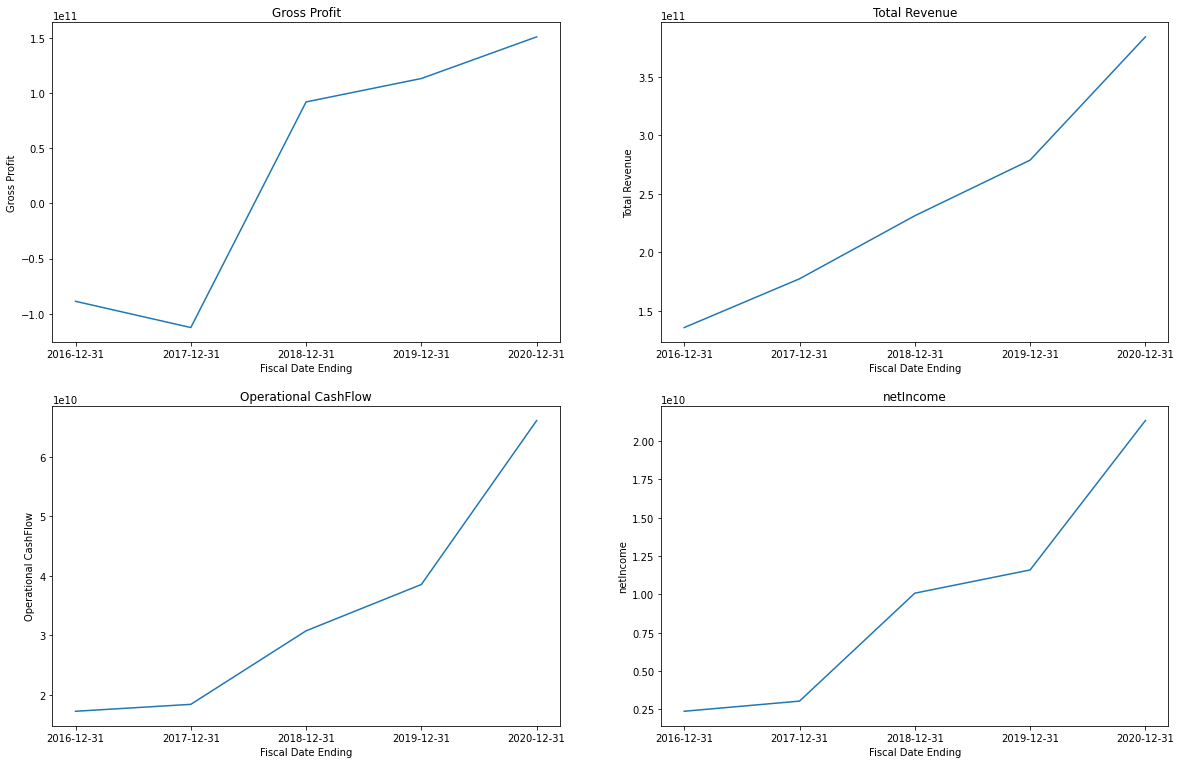

In [17]:
faObj.getYearTrend()

In [20]:
faObj.getIntrinsicPrices([45, 37, 22], [15, 15, 15])

The actual price of the stock is :  3333.0000
The best case intrinsic value :  3948.1979074484166
The average case intrinsic value :  3387.852354829029
The worst case intrinsic value :  2494.6316268839855
